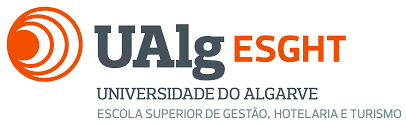

# **Cancellations Prediction Model**

**Teachers**: Prof. Nuno António; Prof. Paulo Carrasco.

**Workgroup**: Bárbara Neves (78123), José Proença (47362), Pedro Esteves (78121).

# *Uses tha dataset "H2.csv", provided by our teachers.*

Hotels' reservations cancellation cause distress over Revenue Management and overrall results, especially over GOP (Gross Operation Profits).

"Last minute" cancellations can cause an impact on different sectors of an hotel, such as:

1. Unpredictability of the occupancy rate (less accurate budget);
2. Lower RevPar (Revenue Per Available Room);
3. Constrained service management, especially with HR;
4. Loss of profits.

# Dataset description

 **IsCanceled**: 0 or 1, N or Y, Binary;
 
 **LeadTime**: timespan betweend reservation and check-in dates;

 **ArrivalDateYear**: date of arrival;

 **ArrivalDateMonth**: 12 options. month of arrival;

**ArrivalDateWeekNumber**: week number of arrival;

**ArrivalDateDayOfMonth**: day of arrival;

**StaysInWeekendNights**: How many weekend nights of stay;

**StaysInWeekNights**: How many week night of stay;

**Adults**: number of adults in the reservation;

**Children**: number of children in the reservation;

**Babies**: number of babies in the reservation;

**Meal**: Undefined/SC, Half board (HF), Full board (FB), Bed & Breakfast (BB);

**Country**: Country of origin (expected);

**MarketSegment**: Travel Agent (TA) or Tour Operator (TO);

**DistributionChannel**: Travel Agent (TA) or Tour Operator (TO);

**IsRepeatedGuest**: 0 or 1, N or Y, Binary;

**PreviousCancellations**: number or previous cancelled reservations;

**PreviousBookingsNotCanceled**: number of previous bookings not cancelled;

**ReservedRoomType**: code of room type;

**AssignedRoomType**: cod of the type of room;

**BookingChanges**: Number of changes/amendments made to the booking;

**DepositType**: No Deposit, Non Refund, Refundable;

**Agent**: ID of the travel agency;

**Company**: company/entity that made the booking or responsible for paying the booking;

**DaysInWaitingList**: Number of days the booking was in the waiting list before it was confirmed to the customer;

**CustomerType**: Contract, Group, Transient, Transient-party;

**ADR**: Average Daily Rate;

**RequiredCarParkingSpaces**: Number of car parking spaces required by the customer;

**TotalOfSpecialRequests**: Number of special requests made by the customer;

**ReservationStatus**: Canceled, Check-Out, No-Show;

**ReservationStatusDate**: Date at which the last status was set.




# Due to the objective of the model, We've chosen a Classification model type


---

In [810]:
#Installing and importing libraries and other modules

%matplotlib inline
%pip install category_encoders
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import category_encoders as ce
import collections
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.regressor import PredictionError
from yellowbrick.classifier import PrecisionRecallCurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---


# 1. **Data Analysis**

#  1.1. Understanding the data

In [811]:
#Importing dataset csv file, as "df"
df = pd.read_csv('H2.csv')

#summary of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [812]:
#making some variables more easy to handle and visual identification easier
df.rename(columns = {'ArrivalDateMonth':'Month', 'ArrivalDateWeekNumber':'Week', 'ArrivalDateYear':'Year', 'ArrivalDateDayOfMonth':'Day'}, inplace = True)

In [813]:
#looking at the first 15 rows
df.head(15)

,IsCanceled,LeadTime,Year,Month,Week,Day,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
5,1,79,2015,July,27,2,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-06-25
6,0,3,2015,July,27,2,0,3,1,0.0,...,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
7,1,63,2015,July,27,2,1,3,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,0,Canceled,2015-06-25
8,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02


In [814]:
#summary for all variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,NaN,NaN,NaN,0.41727,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,NaN,NaN,NaN,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
Year,79330.0,NaN,NaN,NaN,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
Month,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week,79330.0,NaN,NaN,NaN,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
Day,79330.0,NaN,NaN,NaN,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,NaN,NaN,NaN,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,NaN,NaN,NaN,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,NaN,NaN,NaN,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,NaN,NaN,NaN,0.09137,0.372177,0.0,0.0,0.0,0.0,3.0


In [815]:
#checking for missing values
print(df.isnull().sum())

IsCanceled                      0
LeadTime                        0
Year                            0
Month                           0
Week                            0
Day                             0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [816]:
#deleting missing values. since values are small in comparison with the dataset's size, we've decided to just drop them
df = df.dropna(subset=['Children', 'Country'])

In [817]:
#checking if the values were dropped
df.isnull().sum()

IsCanceled                     0
LeadTime                       0
Year                           0
Month                          0
Week                           0
Day                            0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

In [818]:
#creating LOS (Lenght Of Stay), by adding both variables that count Stay Nights.
#we are trying to come up with just one variable in regard to this data

df['LOS'] = df['StaysInWeekendNights']+df['StaysInWeekNights']

In [819]:
#exploring categorical variables: crosstable of CustomerType and MarketSegment, in order to understant relations between the segment
# and the "origin" of the reservation. Transient client leads, with the majority comming from Online TA, which is expected in the sector

table1 = pd.crosstab(index=df['CustomerType'], columns=df['MarketSegment'])
table1

MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
CustomerType,,,,,,,
Contract,0,1,0,2,701,111,1485
Group,2,5,16,51,4,119,95
Transient,218,509,1954,5460,6812,9325,35104
Transient-Party,17,20,1015,578,6457,7178,2063


<Axes: xlabel='CustomerType'>

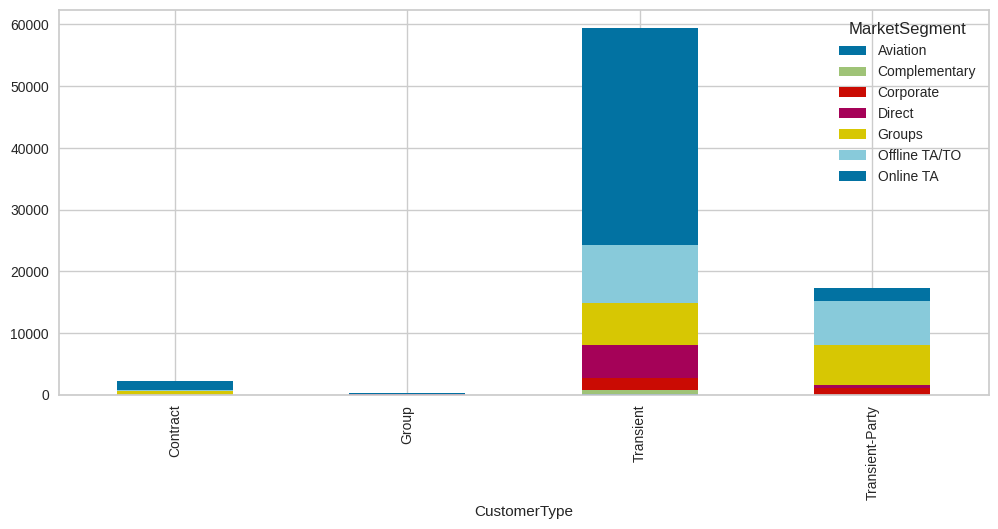

In [820]:
table1.plot(kind="bar", 
                 figsize=(12,5),
                 stacked=True)

In [821]:
#exploring categorical variables: crosstable of CustomerType and IsCanceled, in order to understant relations between the cancellations
# and the "origin" of the customer.

table2 = pd.crosstab(index=df['CustomerType'], columns=df['IsCanceled'])
table2

IsCanceled,0,1
CustomerType,,
Contract,1195,1105
Group,263,29
Transient,32306,27076
Transient-Party,12462,4866


In [822]:
#cancellation counts for Transient customers

transient_not_canceled = 32306
transient_canceled = 27076

#calculate cancellation rate
total_transients = transient_not_canceled + transient_canceled
cancellation_rate = transient_canceled / total_transients * 100

print(f"Cancellation Rate for Transients: {cancellation_rate:.1f}%")

Cancellation Rate for Transients: 45.6%


<Axes: xlabel='CustomerType'>

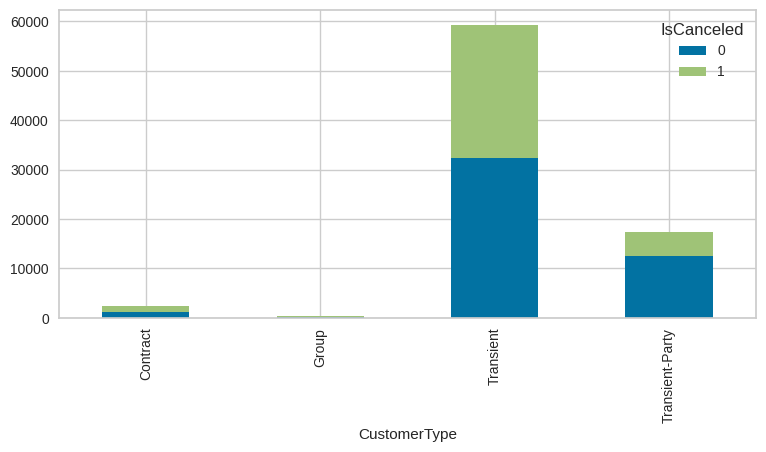

In [823]:
#transient client cancellations' represent 45.6% of total reservations.

table2.plot(kind="bar", 
                 figsize=(9,4),
                 stacked=True)

array([[<Axes: title={'center': 'IsCanceled'}>,
        <Axes: title={'center': 'LeadTime'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Week'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'StaysInWeekendNights'}>,
        <Axes: title={'center': 'StaysInWeekNights'}>,
        <Axes: title={'center': 'Adults'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Babies'}>,
        <Axes: title={'center': 'IsRepeatedGuest'}>,
        <Axes: title={'center': 'PreviousCancellations'}>],
       [<Axes: title={'center': 'PreviousBookingsNotCanceled'}>,
        <Axes: title={'center': 'BookingChanges'}>,
        <Axes: title={'center': 'DaysInWaitingList'}>,
        <Axes: title={'center': 'ADR'}>],
       [<Axes: title={'center': 'RequiredCarParkingSpaces'}>,
        <Axes: title={'center': 'TotalOfSpecialRequests'}>,
        <Axes: title={'center': 'LOS'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Ax

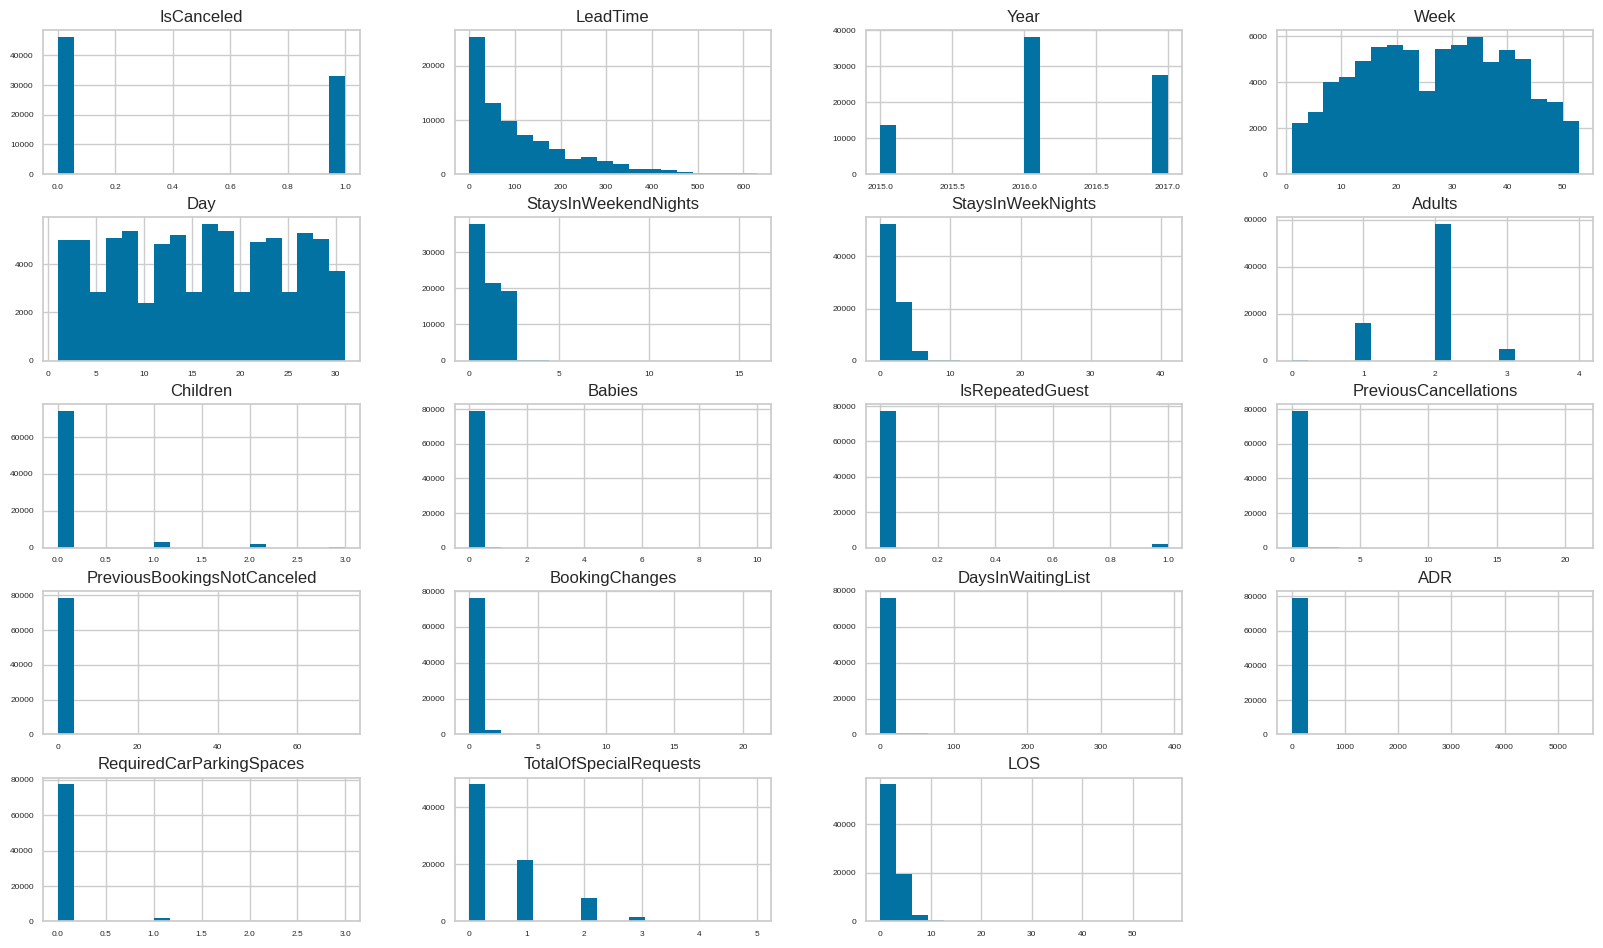

In [824]:
#doing histograms of numeric variables

numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=18, figsize=(20, 14), layout=(6,4), xlabelsize=6, ylabelsize=6)

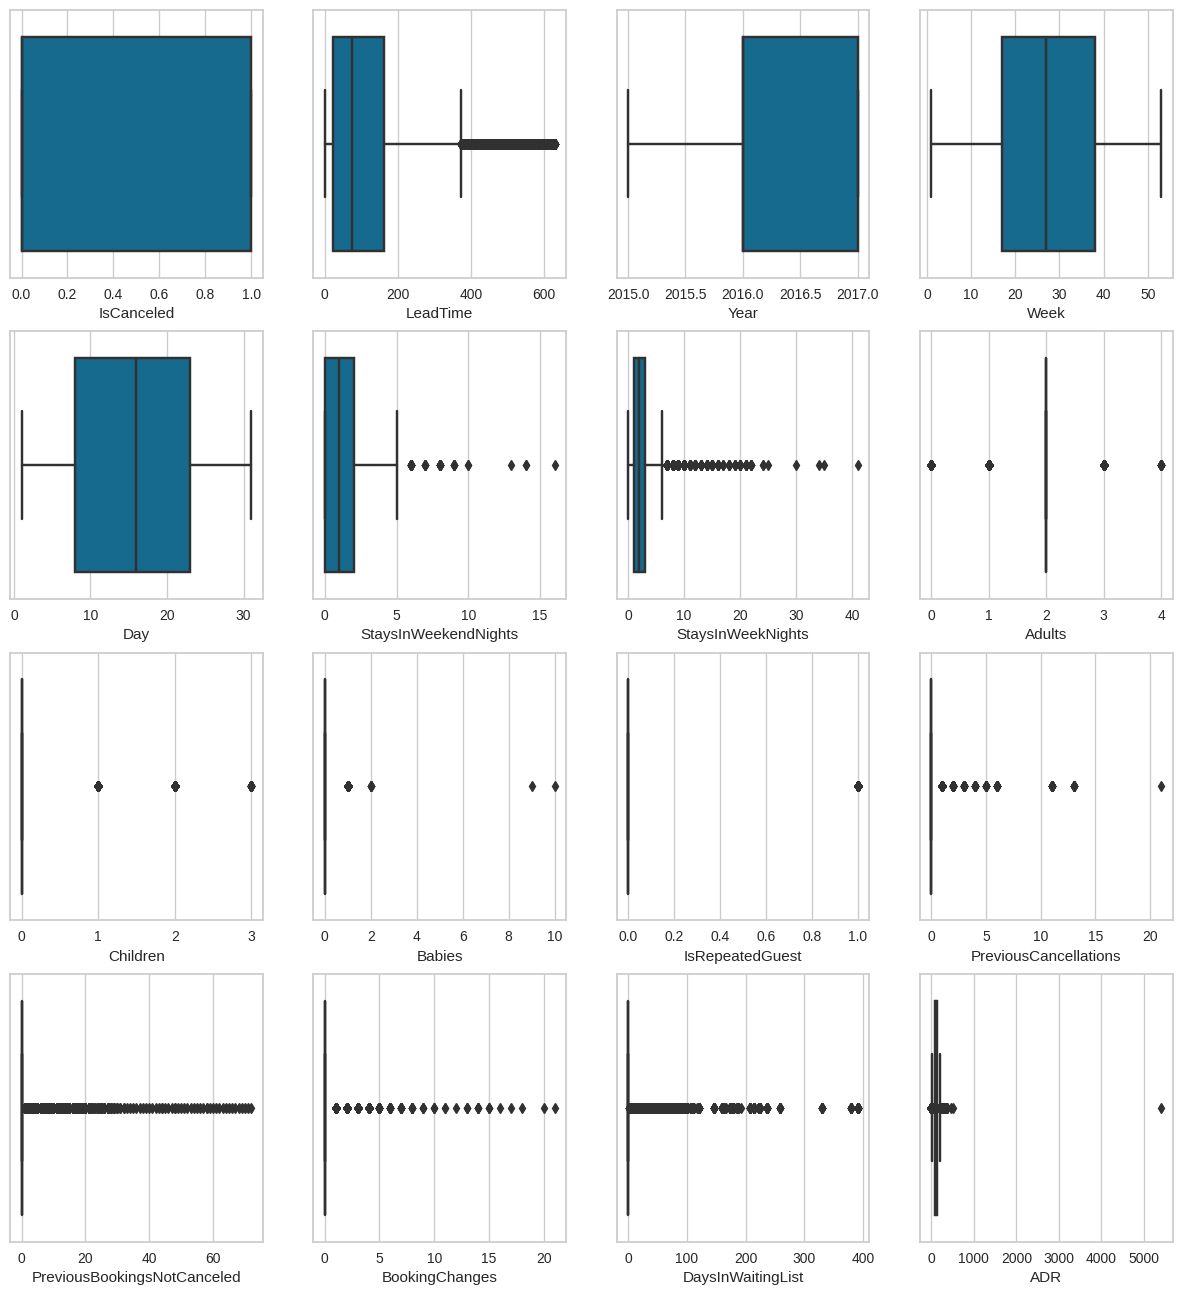

In [825]:
#doing boxplots of numeric variables
fig, ax = plt.subplots(4, 4, figsize=(15, 16))
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(x=df[var], ax=subplot)

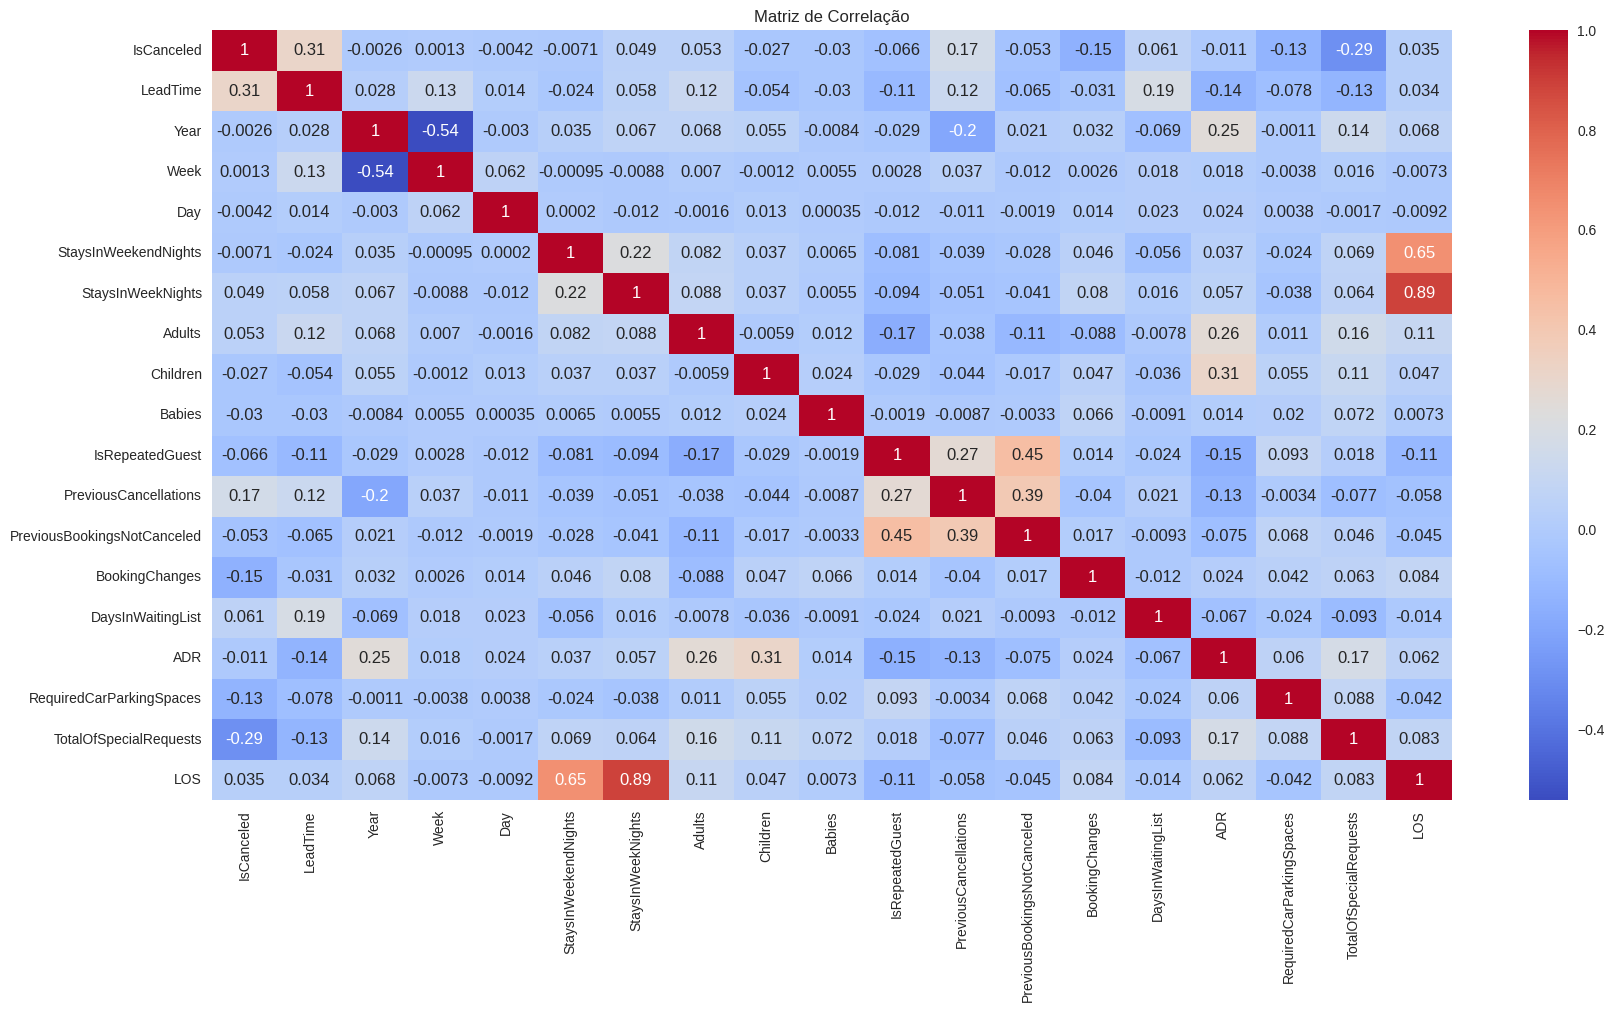

In [826]:
#calculating the correlation matrix
correlation_matrix = df.corr()

#crating a heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

#no significant correlation found. P.S.: It is acceptable that variable LOS has 2 high correlations.

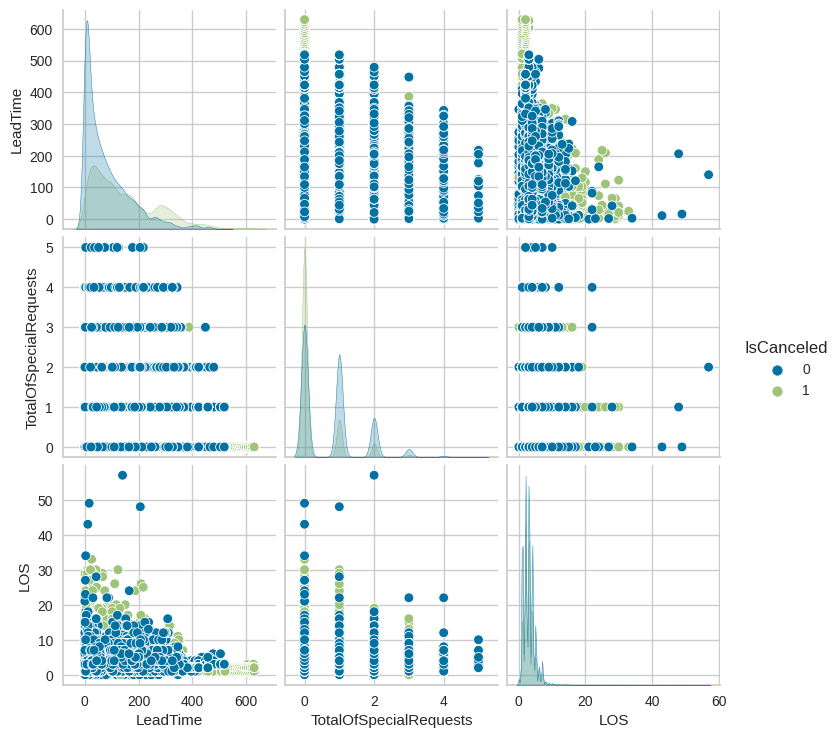

In [827]:
#heatmap between variables. two possible readings: 0 for not cancelled, 1 for cancelled.

sns.pairplot(data=df, hue='IsCanceled', vars= ['LeadTime', 'TotalOfSpecialRequests','LOS']) 

# 1.2. Preparing the dataset

In [828]:
#creating a copy from the original df

X = df.copy(deep=True)

In [829]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79302 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79302 non-null  int64  
 1   LeadTime                     79302 non-null  int64  
 2   Year                         79302 non-null  int64  
 3   Month                        79302 non-null  object 
 4   Week                         79302 non-null  int64  
 5   Day                          79302 non-null  int64  
 6   StaysInWeekendNights         79302 non-null  int64  
 7   StaysInWeekNights            79302 non-null  int64  
 8   Adults                       79302 non-null  int64  
 9   Children                     79302 non-null  float64
 10  Babies                       79302 non-null  int64  
 11  Meal                         79302 non-null  object 
 12  Country                      79302 non-null  object 
 13  MarketSegment   

In [830]:
#removing columns that are not relevant for the model.

# "AssignedRoomType", "Country", "ReservedRoomType", due to uncertainty of the available data. "AssignedRoomType" might change with changes
# to the reservation. "Country" is not certain untill check-in; "ReservedRoomType" might change with reservation updates either;

# "ReservationStatus" and "ReservationStatusDate" are irrelevant;
# "StaysInWeekendNights" and "StaysInWeekNights" are now "LOS";
# "Week" and "Year" may cause bad interpretation, as checked on the heatmap;
# remaining columns are considered not relevant for the model.

cols = ["AssignedRoomType", "Country", "ReservedRoomType", "ReservationStatus", "ReservationStatusDate", "StaysInWeekendNights", "StaysInWeekNights", "Week", "Year", "Babies", "Children", "BookingChanges", "Company", "DistributionChannel", "MarketSegment", "Meal", "PreviousBookingsNotCanceled", "PreviousCancellations", "RequiredCarParkingSpaces", "TotalOfSpecialRequests", "Agent"]

cols_to_drop = [col for col in cols if col in X.columns]
X.drop(columns=cols_to_drop, inplace=True)

In [831]:
#transforming categorical variables (objects) to dummies 

cols = ['Month', 'DepositType', 'CustomerType' ]
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

In [832]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79302 entries, 0 to 79329
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   IsCanceled                    79302 non-null  int64  
 1   LeadTime                      79302 non-null  int64  
 2   Month_July                    79302 non-null  int64  
 3   Month_August                  79302 non-null  int64  
 4   Month_September               79302 non-null  int64  
 5   Month_October                 79302 non-null  int64  
 6   Month_November                79302 non-null  int64  
 7   Month_December                79302 non-null  int64  
 8   Month_January                 79302 non-null  int64  
 9   Month_February                79302 non-null  int64  
 10  Month_March                   79302 non-null  int64  
 11  Month_April                   79302 non-null  int64  
 12  Month_May                     79302 non-null  int64  
 13  M

In [833]:
X.head(15)

,IsCanceled,LeadTime,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December,Month_January,Month_February,...,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,DaysInWaitingList,CustomerType_Transient,CustomerType_Transient-Party,CustomerType_Contract,CustomerType_Group,ADR,LOS
0,0,6,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0.00,2
1,1,88,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,76.50,4
2,1,65,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,68.00,4
3,1,92,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,76.50,6
4,1,100,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,76.50,2
5,1,79,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,76.50,3
6,0,3,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,58.67,3
7,1,63,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,68.00,4
8,1,62,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,76.50,5
9,1,62,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,76.50,5


In [834]:
X.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,79302.0,0.417089,0.493081,0.0,0.0,0.0,1.0,1.0
LeadTime,79302.0,109.740183,110.953223,0.0,23.0,74.0,163.0,629.0
Month_July,79302.0,0.101990,0.302637,0.0,0.0,0.0,0.0,1.0
Month_August,79302.0,0.113225,0.316870,0.0,0.0,0.0,0.0,1.0
Month_September,79302.0,0.093314,0.290874,0.0,0.0,0.0,0.0,1.0
Month_October,79302.0,0.095723,0.294212,0.0,0.0,0.0,0.0,1.0
Month_November,79302.0,0.054904,0.227794,0.0,0.0,0.0,0.0,1.0
Month_December,79302.0,0.052067,0.222163,0.0,0.0,0.0,0.0,1.0
Month_January,79302.0,0.047111,0.211878,0.0,0.0,0.0,0.0,1.0
Month_February,79302.0,0.062609,0.242259,0.0,0.0,0.0,0.0,1.0


---


# **2. Creating the Model - Logistic Regression (LR)**

# 2.1. Modeling and evaluating

In [835]:
#create the Target

y = X['IsCanceled']

In [836]:
#split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [837]:
#remove the Target from the training

X_train = X_train.drop(['IsCanceled'],1)
X_test = X_test.drop(['IsCanceled'],1)

In [838]:
#dataframe for scaling

tempDF = X.copy(deep=True)
tempDF.drop(columns='IsCanceled', inplace=True)

#normalize training/test data

scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [839]:
#create object and train the model

classModel = LogisticRegression(random_state=123, max_iter=200)
classModel.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=123)

In [840]:
#function to create dataframe with metrics

def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [841]:
#predict y for X_train and X_test

y_pred_train = classModel.predict(X_train_scaled) 
y_pred_test = classModel.predict(X_test_scaled)

In [842]:
#function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

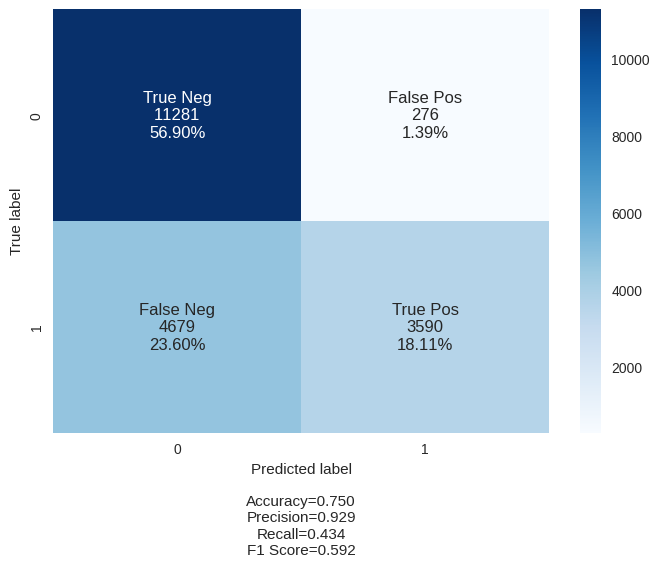

In [843]:
#show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [844]:
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.751194,0.750076
1,PRECISION,0.931981,0.928608
2,RECALL,0.435240,0.434152
3,F1 SCORE,0.593372,0.591677
4,AUC,0.706255,0.705135


# 2.1.1. Evaluating the Model - Oversampling

Counter({0: 34669, 1: 24807})


<Axes: xlabel='y', ylabel='count'>

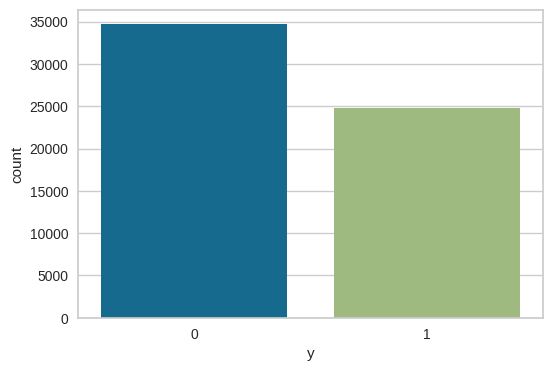

In [845]:
#display target balance in the training dataset

print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train}), ax=ax)

In [846]:
#checking for imbalance level

from collections import Counter

# Counter data
counter_data = Counter({0: 34669, 1: 24807})

# Calculate imbalance ratio
imbalance_ratio = counter_data[1] / counter_data[0]
imbalance_ratio_percentage = round(imbalance_ratio * 100, 1)

# Print the imbalance ratio as a percentage
print("Imbalance Ratio:", imbalance_ratio_percentage, "%")

Imbalance Ratio: 71.6 %


Counter({0: 34669, 1: 34669})


<Axes: xlabel='y', ylabel='count'>

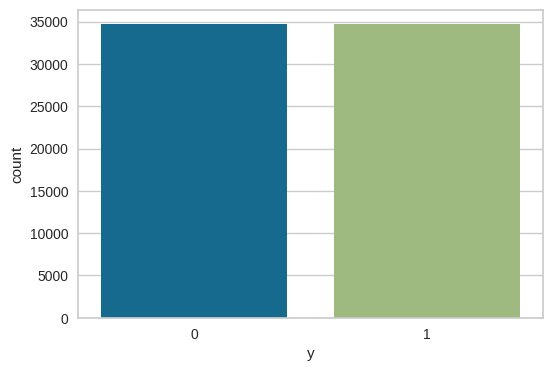

In [847]:
#since we have an Imbalance of 71.6% on our sample, we opted for some balancing with over and undersampling

#testing with oversampling SMOTE method

sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train2}), ax=ax)

In [848]:
#train de model
classModel.fit(X_train_scaled2, y_train2)

#predict values
#predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

#show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.703712,0.738525
1,PRECISION,0.833341,0.787512
2,RECALL,0.509273,0.510944
3,F1 SCORE,0.632197,0.619774
4,AUC,0.703712,0.706151


# 2.1.2. Evaluating the Model - Undersampling

Counter({0: 24807, 1: 24807})


<Axes: xlabel='y', ylabel='count'>

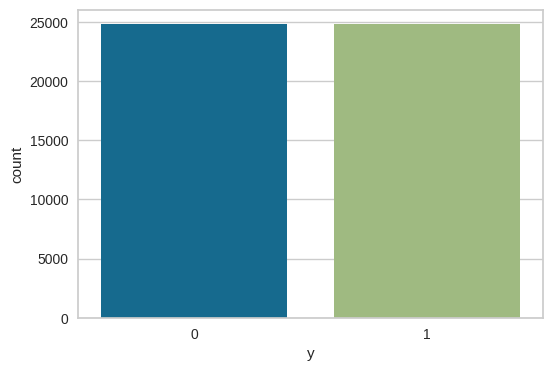

In [849]:
#testing with random undersampling

#subset by class
ss_class_0 = pd.DataFrame(data=X_train_scaled[y_train == 0], index=X_train[y_train == 0].index)
ss_class_1 = pd.DataFrame(data=X_train_scaled[y_train == 1], index=X_train[y_train == 1].index)

#do random under-sampling (the same 0's as the existing 1's)
count_class_0, count_class_1 = y_train.value_counts()
ss_class_0_under = ss_class_0.sample(count_class_1, replace=False)
X_train_scaled3 = pd.concat([ss_class_0_under, ss_class_1], axis=0)
y_train3 = y_train[X_train_scaled3.index]

#present results
print(collections.Counter(y_train3))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train3}), ax=ax)

In [850]:
#train de model

classModel.fit(X_train_scaled3, y_train3)

#predict values
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled3) 
y_pred_test = classModel.predict(X_test_scaled) 

#show performance results
resultsDF = performanceMetricsDF(metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.705063,0.739534
1,PRECISION,0.835997,0.791440
2,RECALL,0.510219,0.509856
3,F1 SCORE,0.633690,0.620182
4,AUC,0.705063,0.706862


In [851]:
#check AUC

FP, TP, thresholds = metrics.roc_curve(y_test, classModel.decision_function(X_test_scaled))
auc = metrics.auc(FP, TP)
auc_rounded = round(auc, 1)

print("AUC: {:.1f}".format(auc_rounded))

AUC: 0.8


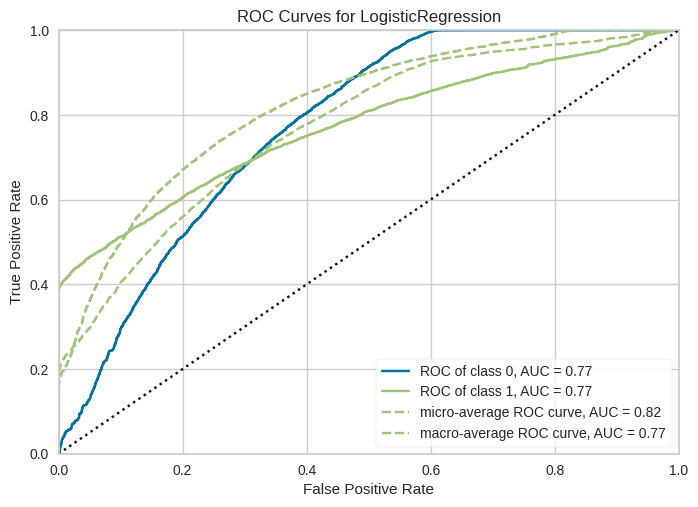

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [852]:
#ROC curve

visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

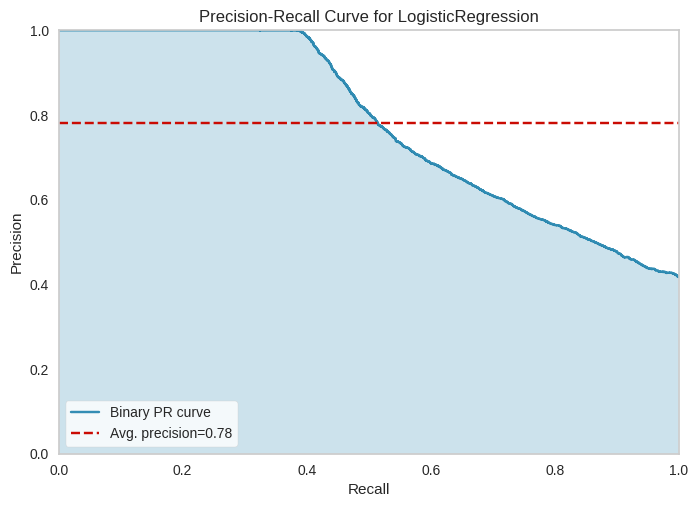

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [853]:
#precison-Recall curve

visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

In [854]:
#show 10 top features coefficients

abs_coef = np.concatenate(np.abs(classModel.coef_))
sorted_index = np.argsort(abs_coef)[::-1] # sort indices
top_10 = sorted_index[:10]
top_10DF = pd.DataFrame(data={'feature': list(X_train.columns[top_10]), 'coef': abs_coef[top_10]})
top_10DF

,feature,coef
0,ADR,4.078409
1,DepositType_Non Refund,3.791743
2,LOS,3.480161
3,DepositType_No Deposit,2.742770
4,LeadTime,2.470736
5,DepositType_Refundable,0.850842
6,CustomerType_Group,0.781142
7,Adults,0.668689
8,CustomerType_Contract,0.596985
9,CustomerType_Transient,0.500374


---



# **3. Creating the Model - K-Nearest Neighbors (KNN)**

# 3.1. Modeling and evaluating

In [855]:
#training the KNN Model

classModel = KNeighborsClassifier(n_neighbors=5)
classModel.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [856]:
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [857]:
#predict y for X_train and X_test

y_pred_train = classModel.predict(X_train_scaled) 
y_pred_test = classModel.predict(X_test_scaled) 

In [858]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

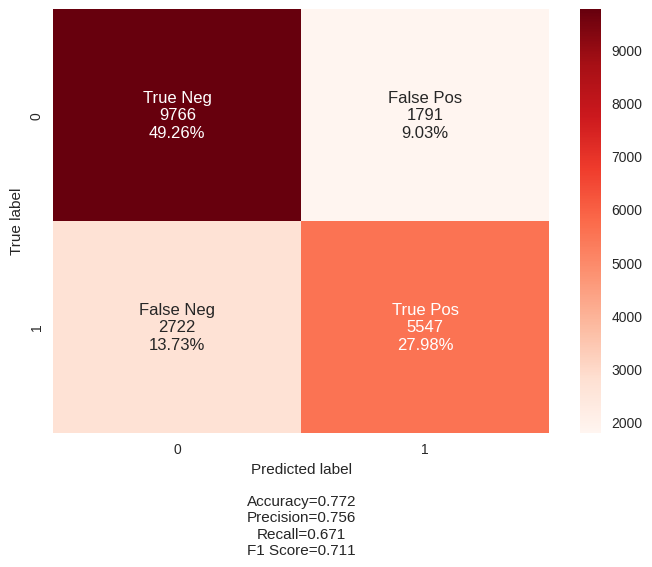

In [859]:
#show the confusion matrix

cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

In [860]:
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.840793,0.772370
1,PRECISION,0.853020,0.755928
2,RECALL,0.747007,0.670819
3,F1 SCORE,0.796501,0.710835
4,AUC,0.827454,0.757924


# 3.1.1. Evaluating - Oversampling

Counter({0: 34669, 1: 24807})


<Axes: xlabel='y', ylabel='count'>

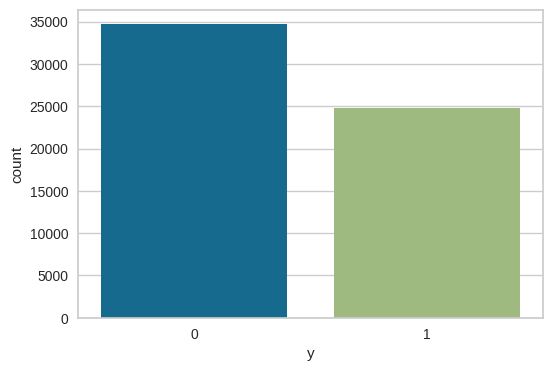

In [861]:
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train}), ax=ax)

Counter({0: 34669, 1: 34669})


<Axes: xlabel='y', ylabel='count'>

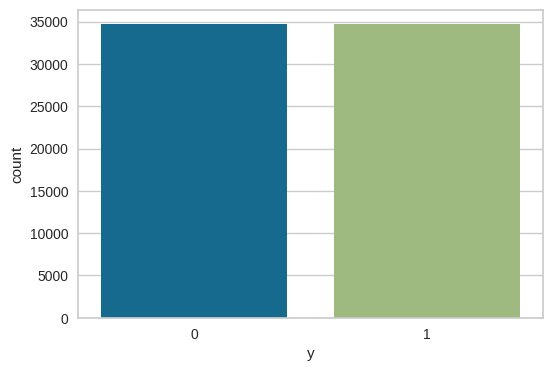

In [862]:
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train2}), ax=ax)

In [863]:
classModel.fit(X_train_scaled2, y_train2)

y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.854856,0.756734
1,PRECISION,0.859565,0.702040
2,RECALL,0.848308,0.724030
3,F1 SCORE,0.853899,0.712865
4,AUC,0.854856,0.752081


# 3.1.2. Evaluating - Undersampling

Counter({0: 24807, 1: 24807})


<Axes: xlabel='y', ylabel='count'>

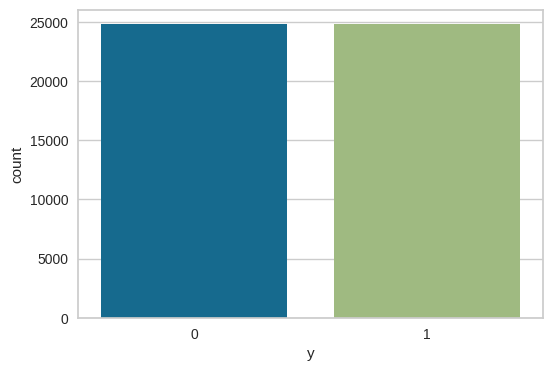

In [864]:
ss_class_0 = pd.DataFrame(data=X_train_scaled[y_train == 0], index=X_train[y_train == 0].index)
ss_class_1 = pd.DataFrame(data=X_train_scaled[y_train == 1], index=X_train[y_train == 1].index)

count_class_0, count_class_1 = y_train.value_counts()
ss_class_0_under = ss_class_0.sample(count_class_1, replace=False)
X_train_scaled3 = pd.concat([ss_class_0_under, ss_class_1], axis=0)
y_train3 = y_train[X_train_scaled3.index]

print(collections.Counter(y_train3))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train3}), ax=ax)

In [865]:
classModel.fit(X_train_scaled3, y_train3)

y_pred_train = classModel.predict(X_train_scaled3) 
y_pred_test = classModel.predict(X_test_scaled) 

resultsDF = performanceMetricsDF(metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.825856,0.751286
1,PRECISION,0.854804,0.698313
2,RECALL,0.785061,0.710727
3,F1 SCORE,0.818449,0.704465
4,AUC,0.825856,0.745517


In [869]:
#using 'predict.proba' method

#predict probabilities using KNN classifier
y_probabilities = classModel.predict_proba(X_test_scaled)[:, 1]

#calculate the AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probabilities)
auc = metrics.auc(fpr, tpr)
print("AUC: {:.3f}".format(auc))

AUC: 0.829


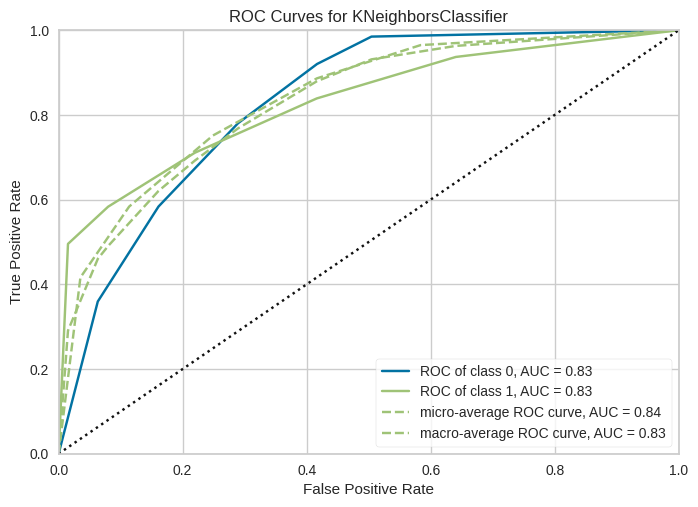

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [870]:
#ROC curve

visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train3)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

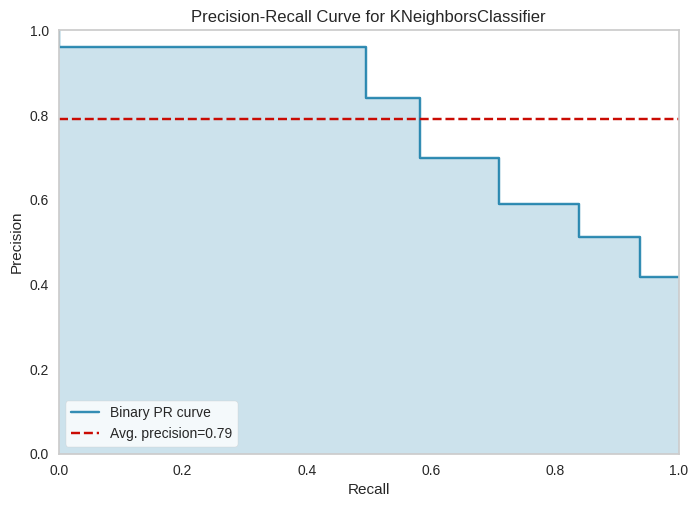

<Axes: title={'center': 'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [871]:
#Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

????????

In [877]:
# Show 10 top features coefficients

# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to your training data
rf.fit(X_train_scaled3, y_train3)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the top 10 features
top_10_features = feature_importances.head(10)
print(top_10_features)

                         Feature  Importance
0                       LeadTime    0.252349
24                           ADR    0.204861
13                           Day    0.140260
17   DepositType_Non Refund         0.111758
16   DepositType_No Deposit         0.101053
25                           LOS    0.072445
14                        Adults    0.021162
21  CustomerType_Transient-Party    0.011359
20        CustomerType_Transient    0.008789
2                   Month_August    0.006255


In [875]:
print(X_train_scaled2.shape)
print(y_train2.shape)


(69338, 26)
(69338,)
